### Interview Attendance Problem

The Dataset consists of details of 1200 + candidates and the interviews they have attended. Also deals with candidate interview attendance for various clients. There are a set of questions that are asked by a recruiter while scheduling the candidate. The answers to these determine whether expected attendance is yes, no or uncertain.

**Objective: ** We would like to know if we can predict whether a candidate will attend interviews or not

**Attributes description:**

1. Date of Interview: This date refers to the day the candidates were scheduled for the interview. The formats vary.<br/>
2. Client name: The clients that gave the recruitment vendor the requisite mandate<br/>
3. Industry: This refers to the vertical the client belongs(Note Candidates can jump across verticals in their job hunt)<br/>
4. LocationRefers: to the current location of the candidate<br/>
5. Position to be closed: Niche refers to rare skill sets while routine refers to more common skill sets<br/>
6. Nature of Skillset: This refers to the skill the client has and specifies the same<br/>
7. Interview Type: There are three types of interview-  <br/>
 * Walkin drives- these are unscheduled. Candidates are either contacted or they come to the interview on their own volition<br/>
 * Scheduled- Here the candidates profiles are screened by the client and subsequent to this, the vendor fixes an appointment between the client and the candidate. <br/>
 * The third one is a scheduled walkin. Here the number of candidates is larger and the candidates are informed beforehand of a tentative date to ascertain their availability. The profiles are screened as in a scheduled interview. In a sense it bears features of both a walk-in and a scheduled interview<br/>
8. Name(Cand ID): This is a substitute to keep the candidates identity a secret<br/>
9. Gender: Whether the candidate is male or female<br/>
10. Candidate Current Location<br/>
11. Candidate Job Location<br/>
12. Interview Venue<br/>
13. Candidate Native location<br/>
14. Have you obtained the necessary permission to start at the required time<br/>
15. Hope there will be no unscheduled meetings<br/>
16. Can I Call you three hours before the interview and follow up on your attendance for the interview<br/>
17. Can I have an alternative number/ desk number. I assure you that I will not trouble you too much<br/>
18. Have you taken a printout of your updated resume. Have you read the JD and understood the same<br/>
19. Are you clear with the venue details and the landmark.<br/>
20. Has the call letter been shared<br/>
21. Expected Attendance: Whether the candidate was expected to attend the interview. Here the it is either yes no or uncertain<br/>
22. Observed Attendance: Whether the candidate attended the interview. This is binary and will form our dependent variable<br/>
23. Marital Status: Whether the candidate is married or Single<br/>


### Importing data <a name='id'></a>

In [1]:
# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing

# import visualization libraries
import seaborn as sns ### For visualizations
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
%matplotlib inline

In [2]:
# to remove teh printing barrier
pd.set_option('display.max_columns', None)

In [3]:
# TO print multiple outputs in single line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
data = pd.read_csv("attachment_Interview_lyst6345.csv")

In [5]:

data.head()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,Candidate Job Location,Interview Venue,Candidate Native location,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,Hosur,Hosur,Hosur,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,Bangalore,Hosur,Trichy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,Chennai,Hosur,Chennai,NaN,Na,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,Chennai,Hosur,Chennai,Yes,Yes,No,Yes,No,Yes,Yes,Uncertain,No,Single
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,Bangalore,Hosur,Chennai,Yes,Yes,Yes,No,Yes,Yes,Yes,Uncertain,No,Married


**Observations:**<br/>
There are missing values.<br/>
Most of the variables are categorical data.

In [6]:
data1 = data.rename(columns={'Have you obtained the necessary permission to start at the required time': 'permission', 
                             'Hope there will be no unscheduled meetings': 'meetings', 'Can I Call you three hours before the interview and follow up on your attendance for the interview' : 'Reminder',
                             'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much': 'Alternate number',
                             'Have you taken a printout of your updated resume. Have you read the JD and understood the same' :'Resume printout & JD',
                             'Are you clear with the venue details and the landmark.' : 'Venue clear',
                             'Has the call letter been shared' : 'Call letter shared',
                             'Nature of Skillset' : 'Skillset',
                             'Position to be closed' : 'Position',
                             'Candidate Native location' : 'Native',
                             'Candidate Current Location' : 'Current Location'}) ### renaming column names


**Note:**<br/>
Renamed some column names as short and simple

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 23 columns):
Date of Interview         1232 non-null object
Client name               1232 non-null object
Industry                  1232 non-null object
Location                  1232 non-null object
Position                  1232 non-null object
Skillset                  1232 non-null object
Interview Type            1232 non-null object
Name(Cand ID)             1232 non-null object
Gender                    1232 non-null object
Current Location          1232 non-null object
Candidate Job Location    1232 non-null object
Interview Venue           1232 non-null object
Native                    1232 non-null object
permission                1028 non-null object
meetings                  985 non-null object
Reminder                  985 non-null object
Alternate number          985 non-null object
Resume printout & JD      984 non-null object
Venue clear               984 non-null object
Call 

**Observations**<br/>
There are missing values.<br/>
23 columns and 1232 rows

### Question: Perform Descriptive Statistics on the dataset 

In [8]:
data1.shape

(1232, 23)

In [9]:
data1.describe()

,Date of Interview,Client name,Industry,Location,Position,Skillset,Interview Type,Name(Cand ID),Gender,Current Location,Candidate Job Location,Interview Venue,Native,permission,meetings,Reminder,Alternate number,Resume printout & JD,Venue clear,Call letter shared,Expected Attendance,Observed Attendance,Marital Status
count,1232,1232,1232,1232,1232,1232,1232,1232,1232,1232,1232,1232,1232,1028,985,985,985,984,984,987,1227,1232,1232
unique,95,15,7,11,7,91,6,1232,2,10,7,7,46,7,7,5,6,8,6,12,6,8,2
top,06.02.2016,Standard Chartered Bank,BFSI,Chennai,Routine,JAVA/J2EE/Struts/Hibernate,Scheduled Walk In,Candidate 815,Male,Chennai,Chennai,Chennai,Chennai,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
freq,220,903,948,754,1022,220,456,1,964,754,893,852,595,917,948,950,935,939,946,932,882,700,767


 Removing the Date of interview and Candidate ID as it be having no impact on the prediction

In [10]:
data1.drop(['Date of Interview', 'Name(Cand ID)'], axis=True, inplace=True)

In [11]:
data1.head()

,Client name,Industry,Location,Position,Skillset,Interview Type,Gender,Current Location,Candidate Job Location,Interview Venue,Native,permission,meetings,Reminder,Alternate number,Resume printout & JD,Venue clear,Call letter shared,Expected Attendance,Observed Attendance,Marital Status
0,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Hosur,Hosur,Hosur,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
1,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Bangalore,Hosur,Trichy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
2,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Chennai,Hosur,Chennai,NaN,Na,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
3,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Chennai,Hosur,Chennai,Yes,Yes,No,Yes,No,Yes,Yes,Uncertain,No,Single
4,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Bangalore,Hosur,Chennai,Yes,Yes,Yes,No,Yes,Yes,Yes,Uncertain,No,Married


In [12]:
data1.tail()

,Client name,Industry,Location,Position,Skillset,Interview Type,Gender,Current Location,Candidate Job Location,Interview Venue,Native,permission,meetings,Reminder,Alternate number,Resume printout & JD,Venue clear,Call letter shared,Expected Attendance,Observed Attendance,Marital Status
1227,Pfizer,Pharmaceuticals,Chennai,Niche,generic drugs – RA,Scheduled,Male,Chennai,Chennai,Chennai,Bangalore,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Married
1228,Pfizer,Pharmaceuticals,Chennai,Niche,Biosimiliars,Scheduled,Male,Chennai,Chennai,Chennai,Hyderabad,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
1229,Pfizer,Pharmaceuticals,Chennai,Niche,Biosimiliars,Scheduled,Male,Chennai,Chennai,Chennai,Hyderabad,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Married
1230,Pfizer,Pharmaceuticals,Chennai,Niche,generic drugs – RA,Scheduled,Male,Chennai,Chennai,Chennai,Chennai,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
1231,Pfizer,Pharmaceuticals,Chennai,Niche,generic drugs – RA,Scheduled,Female,Chennai,Chennai,Chennai,Kolkata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,Yes,Single


###  Question: Remove missing values from the data frame if any

In [13]:
data1.isna().sum()

Client name                 0
Industry                    0
Location                    0
Position                    0
Skillset                    0
Interview Type              0
Gender                      0
Current Location            0
Candidate Job Location      0
Interview Venue             0
Native                      0
permission                204
meetings                  247
Reminder                  247
Alternate number          247
Resume printout & JD      248
Venue clear               248
Call letter shared        245
Expected Attendance         5
Observed Attendance         0
Marital Status              0
dtype: int64

In [14]:
# Let's look at CLient Name 
data1['Client name'].value_counts()

Standard Chartered Bank            903
Pfizer                              75
Hospira                             75
Aon Hewitt                          28
Flextronics                         23
ANZ                                 22
Hewitt                              20
UST                                 18
Standard Chartered Bank Chennai     17
Prodapt                             17
Astrazeneca                         15
Williams Lea                        11
Barclays                             5
Aon hewitt Gurgaon                   2
Woori Bank                           1
Name: Client name, dtype: int64

In [15]:
data1.replace(['Standard Chartered Bank Chennai', 'Aon hewitt Gurgaon', 'Hewitt'],['Standard Chartered Bank','Aon Hewitt','Aon Hewitt'], inplace=True)


In [16]:
# data1['Client name'].value_counts()

In [17]:
# industry 
data1['Industry'].value_counts()

BFSI                        948
Pharmaceuticals             165
IT Products and Services     45
Electronics                  23
IT Services                  23
Telecom                      17
IT                           11
Name: Industry, dtype: int64

In [18]:
data1.replace(['IT Services', 'IT'],['IT Products and Services','IT Products and Services'], inplace=True)

In [19]:
data1['Industry'].value_counts()

BFSI                        948
Pharmaceuticals             165
IT Products and Services     79
Electronics                  23
Telecom                      17
Name: Industry, dtype: int64

In [20]:
# Location
data1['Location'].value_counts()

Chennai       754
Bangalore     291
chennai        86
Hyderabad      38
Gurgaon        33
Noida          15
- Cochin-       9
chennai         3
CHENNAI         1
Delhi           1
Gurgaonr        1
Name: Location, dtype: int64

As we can see there are few cities names which are repeated but with different naming conventions. So wil club them into one

In [21]:
data1.replace(['- Cochin- ', 'chennai', 'CHENNAI', 'Gurgaonr'],['Cochin','Chennai', 'Chennai','Gurgaon'], inplace=True)

In [22]:
data1['Location'].value_counts()

Chennai      841
Bangalore    291
Hyderabad     38
Gurgaon       34
Noida         15
Cochin         9
chennai        3
Delhi          1
Name: Location, dtype: int64

In [23]:
# Position
data1['Position'].value_counts()

Routine                1022
Niche                   163
Dot Net                  18
Trade Finance            11
AML                       8
Production- Sterile       5
Selenium testing          5
Name: Position, dtype: int64

Position Columns values looks perfect and do not require any changes 

In [24]:
data1['Interview Type'].value_counts()

Scheduled Walk In    456
Scheduled            370
Walkin               189
Scheduled Walkin     189
Walkin                27
Sceduled walkin        1
Name: Interview Type, dtype: int64

In [25]:
data1.replace(['Scheduled Walkin', 'Walkin ', 'Sceduled walkin'],['Scheduled Walk In','Walkin', 'Scheduled Walk In'], inplace=True)

In [26]:
data1['Interview Type'].value_counts()

Scheduled Walk In    646
Scheduled            370
Walkin               216
Name: Interview Type, dtype: int64

In [27]:
data1['Gender'].value_counts()

Male      964
Female    268
Name: Gender, dtype: int64

No changes are requried fro Gender column

In [28]:
data1['Current Location'].value_counts()

Chennai      841
Bangalore    291
Hyderabad     38
Gurgaon       34
Noida         15
Cochin         9
chennai        3
Delhi          1
Name: Current Location, dtype: int64

No changes are requried fro 'Currebt Location' column

In [29]:
data1['Candidate Job Location'].value_counts()

Chennai          893
Bangalore        258
Gurgaon           35
Visakapatinam     21
Noida             15
Cochin             9
Hosur              1
Name: Candidate Job Location, dtype: int64

No changes are requried fro 'Candidate job Location' column

In [30]:
data1['Interview Venue'].value_counts()

Chennai      852
Bangalore    276
Hyderabad     40
Gurgaon       35
Noida         15
Cochin         9
Hosur          5
Name: Interview Venue, dtype: int64

In [31]:
data1['Native'].value_counts()

Chennai          595
Hyderabad        172
Bangalore        151
Cochin            29
Gurgaon           26
Cuttack           25
Pune              22
Coimbatore        21
Allahabad         20
Noida             17
Nagercoil         16
Visakapatinam     16
Trivandrum        14
Kolkata           14
Trichy            13
Vellore           12
Mumbai             7
Chitoor            6
Chandigarh         5
Ahmedabad          5
Pondicherry        5
Vijayawada         4
Delhi              4
Hosur              3
Tirupati           3
Salem              3
Warangal           3
Ambur              2
Patna              2
Delhi /NCR         2
Agra               1
Tanjore            1
Anantapur          1
Lucknow            1
Kurnool            1
Ghaziabad          1
Baddi              1
Bhubaneshwar       1
Tuticorin          1
Belgaum            1
Kanpur             1
Hissar             1
Panjim             1
Mysore             1
Faizabad           1
Name: Native, dtype: int64

In [32]:
data1['permission'].value_counts()

Yes               917
No                 79
Not yet            18
Na                  5
yes                 4
Yet to confirm      4
NO                  1
Name: permission, dtype: int64

In [33]:
data1.replace(['NO', 'yes', 'Not yet'],['No', 'Yes', 'No'], inplace=True)

In [34]:
data1['permission'].value_counts()

Yes               921
No                 98
Na                  5
Yet to confirm      4
Name: permission, dtype: int64

In [35]:
data1['meetings'].value_counts()

Yes         953
Na           20
No            6
Not sure      4
Not Sure      1
cant Say      1
Name: meetings, dtype: int64

In [36]:
data1.replace(['cant Say', 'Not sure', 'Not Sure'],['No', 'No', 'No'], inplace=True)

In [37]:
data1['meetings'].value_counts()

Yes    953
Na      20
No      12
Name: meetings, dtype: int64

In [38]:
data1['Reminder'].value_counts()

Yes        954
Na          20
No          10
No Dont      1
Name: Reminder, dtype: int64

In [39]:
data1.replace(['No Dont'],['No'], inplace=True)

In [40]:
data1['Alternate number'].value_counts()

Yes                          936
No                            27
Na                            19
No I have only thi number      2
na                             1
Name: Alternate number, dtype: int64

In [41]:
data1.replace(['No I have only thi number','na'],['No','Na'], inplace=True)

In [42]:
data1['Resume printout & JD'].value_counts()

Yes                      941
Na                        20
No                        18
Not Yet                    4
No- will take it soon      1
Name: Resume printout & JD, dtype: int64

In [43]:
data1.replace(['Not Yet','No- will take it soon'],['No','No'], inplace=True)

In [44]:
data1['Resume printout & JD'].value_counts()

Yes    941
No      23
Na      20
Name: Resume printout & JD, dtype: int64

In [45]:
data1['Venue clear'].value_counts()

Yes                    948
Na                      20
No                      14
No- I need to check      2
Name: Venue clear, dtype: int64

In [46]:
data1.replace(['No- I need to check'],['No'], inplace=True)

In [47]:
data1['Call letter shared'].value_counts()

Yes               933
No                 28
Na                 20
Need To Check       3
Yet to Check        1
Havent Checked      1
no                  1
Name: Call letter shared, dtype: int64

In [48]:
data1.replace(['Need To Check','Havent Checked', 'Yet to Check', 'no'],['No', 'No', 'No', 'No'], inplace=True)

In [49]:
data1['Expected Attendance'].value_counts()

Yes          883
Uncertain    250
No            93
10.30 Am       1
Name: Expected Attendance, dtype: int64

In [50]:
data1.replace(['10.30 Am'],['No'], inplace=True)

In [51]:
data1['Observed Attendance'].value_counts()

Yes     781
No      443
No        6
no        1
yes       1
Name: Observed Attendance, dtype: int64

In [52]:
data1.replace(['No ','no ', 'yes '],['No', 'No', 'Yes'], inplace=True)

In [53]:
data1['Observed Attendance'].value_counts()

Yes    782
No     450
Name: Observed Attendance, dtype: int64

In [54]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 21 columns):
Client name               1232 non-null object
Industry                  1232 non-null object
Location                  1232 non-null object
Position                  1232 non-null object
Skillset                  1232 non-null object
Interview Type            1232 non-null object
Gender                    1232 non-null object
Current Location          1232 non-null object
Candidate Job Location    1232 non-null object
Interview Venue           1232 non-null object
Native                    1232 non-null object
permission                1028 non-null object
meetings                  985 non-null object
Reminder                  985 non-null object
Alternate number          985 non-null object
Resume printout & JD      984 non-null object
Venue clear               984 non-null object
Call letter shared        987 non-null object
Expected Attendance       1227 non-null object
Observ

In [80]:
data1.to_csv("Interview_clean.csv")

In [55]:
# # Printing the Unique values in a particular column
# missing_col = ['permission', 'meetings', 'Reminder', 'Alternate number', 'Resume printout & JD', 'Venue clear', 'Call letter shared', 'Expected Attendance']
# for col in missing_col:
#     print(col + " Column name :: " + str(data1[col].unique()))


Since the last record was made on 2016 
1. we will replace the Permission missing values with 'No'
2. we will replace the Meeting missing values with 'Can't say'
3. Since the candidate haven't specified we will replace the Reminder missing values with 'No' 
4. Since the candidate haven't specified we will replace the Alternative Number missing values with 'No' 
5.If there is ne entry made will consider the candiate not instereted in interview and haven't read the JD deatils

In [56]:
# data1.loc[data1['Expected Attendance']=='10.30 Am']

In [57]:
# data1[['permission']] = data1[['permission']].replace(to_replace={'na':'No','Na':'No',np.nan:'No', 'NO':'No', 'yes':'Yes'})
# data1[['meetings']] = data1[['meetings']].replace(to_replace={'Na':'cant Say',np.nan:'cant Say','na':'No', 'yes':'Yes'})
# data1[['Reminder']] = data1[['Reminder']].replace(to_replace={'Na':'No',np.nan:'No','NO':'No', 'yes':'Yes','na':'No'})
# data1[['Alternate number']] = data1[['Alternate number']].replace(to_replace={'Na':'No',np.nan:'No', 'NO':'No', 'yes':'Yes','na':'No'})
# data1[['Resume printout & JD']] = data1[['Resume printout & JD']].replace(to_replace={'Na':'No',np.nan:'No', 'NO':'No', 'yes':'Yes','na':'No'})
# data1[['Venue clear']] = data1[['Venue clear']].replace(to_replace={'Na':'No',np.nan:'No','NO':'No', 'yes':'Yes','na':'No'})
# data1[['Call letter shared']] = data1[['Call letter shared']].replace(to_replace={'Na':'No',np.nan:'No', 'no':'No', 'yes':'Yes','na':'No'})
# data1[['Expected Attendance']] = data1[['Expected Attendance']].replace(to_replace={'Na':'No',np.nan:'No','NO':'No', 'yes':'Yes', '10.30 Am':'Yes','na':'No'})
# data1[['Observed Attendance']] = data1[['Observed Attendance']].replace(to_replace={'Na':'No',np.nan:'No','no':'No','NO':'No', 'no ':'No', 'No ':'No', 'yes':'Yes', 'yes ':'Yes', '10.30 Am':'Yes','na':'No'})


In [58]:
# data1.isna().sum()

In [59]:
# # Printing the Unique values in a particular column

# for col in data1.columns:
#     print(col + " Column name :: " + str(data1[col].unique()))


### Question: Perform EDA and find any correlation

In [60]:
data1.head()

,Client name,Industry,Location,Position,Skillset,Interview Type,Gender,Current Location,Candidate Job Location,Interview Venue,Native,permission,meetings,Reminder,Alternate number,Resume printout & JD,Venue clear,Call letter shared,Expected Attendance,Observed Attendance,Marital Status
0,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walk In,Male,Chennai,Hosur,Hosur,Hosur,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
1,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walk In,Male,Chennai,Bangalore,Hosur,Trichy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
2,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walk In,Male,Chennai,Chennai,Hosur,Chennai,NaN,Na,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
3,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walk In,Male,Chennai,Chennai,Hosur,Chennai,Yes,Yes,No,Yes,No,Yes,Yes,Uncertain,No,Single
4,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walk In,Male,Chennai,Bangalore,Hosur,Chennai,Yes,Yes,Yes,No,Yes,Yes,Yes,Uncertain,No,Married


In [61]:
data1.replace(['Na'], [np.nan], inplace=True)

In [62]:
data1 = data1.ffill().bfill()

In [63]:
ven = data1.groupby(['permission','Observed Attendance']).size().unstack()
ven

Observed Attendance,No,Yes
permission,,
No,105.0,21.0
Yes,341.0,761.0
Yet to confirm,4.0,NaN


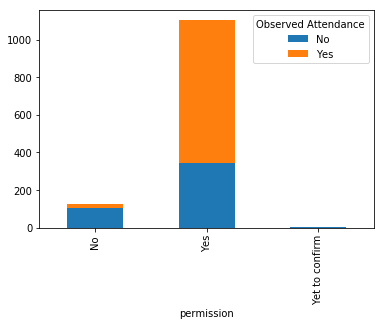

In [64]:
ven.plot(kind = 'bar', stacked = True)

In [65]:
ven['perc'] = (ven['No']/(ven['Yes'] + ven['No']))
ven

Observed Attendance,No,Yes,perc
permission,,,
No,105.0,21.0,0.833333
Yes,341.0,761.0,0.309437
Yet to confirm,4.0,NaN,NaN


In [66]:
# #dummification by encoding 
# data_col = data1.columns

# for x in data_col:
#     y_dummies = pd.get_dummies(data1[x],  prefix=x , drop_first= True)
#     data1.drop([x], axis=1, inplace=True)
#     data1 = pd.concat([data1, y_dummies], axis=1)
    

In [67]:
# dummification by encoding 
from  sklearn.preprocessing import LabelEncoder

data1 = data1.apply(LabelEncoder().fit_transform)

In [68]:
data1.head()

,Client name,Industry,Location,Position,Skillset,Interview Type,Gender,Current Location,Candidate Job Location,Interview Venue,Native,permission,meetings,Reminder,Alternate number,Resume printout & JD,Venue clear,Call letter shared,Expected Attendance,Observed Attendance,Marital Status
0,5,3,1,3,70,1,1,1,4,4,21,1,1,1,1,1,1,1,2,0,1
1,5,3,1,3,70,1,1,1,0,4,38,1,1,1,1,1,1,1,2,0,1
2,5,3,1,3,70,1,1,1,1,4,10,1,1,1,1,1,1,1,1,0,1
3,5,3,1,3,70,1,1,1,1,4,10,1,1,0,1,0,1,1,1,0,1
4,5,3,1,3,70,1,1,1,0,4,10,1,1,1,0,1,1,1,1,0,0


In [69]:
# correlation 
data1_corr = data1.corr()
data1_corr

,Client name,Industry,Location,Position,Skillset,Interview Type,Gender,Current Location,Candidate Job Location,Interview Venue,Native,permission,meetings,Reminder,Alternate number,Resume printout & JD,Venue clear,Call letter shared,Expected Attendance,Observed Attendance,Marital Status
Client name,1.000000,-0.530080,-0.476327,0.339549,-0.016136,0.401276,0.018187,-0.476327,-0.436749,-0.468995,-0.141805,0.024545,0.006477,0.056589,0.055467,0.003266,-0.017736,0.022429,0.025637,-0.062912,0.001342
Industry,-0.530080,1.000000,0.389116,-0.438385,0.191874,-0.359192,0.043980,0.389116,0.406345,0.451178,0.170203,-0.168669,-0.129466,-0.099856,-0.064401,-0.060075,-0.005123,-0.054840,-0.160787,-0.045561,-0.155246
Location,-0.476327,0.389116,1.000000,-0.068852,0.102834,-0.341174,-0.035912,1.000000,0.775971,0.888242,0.218122,-0.003052,-0.047227,-0.100828,-0.064777,-0.065366,-0.010464,-0.034431,-0.015871,0.045200,-0.029547
Position,0.339549,-0.438385,-0.068852,1.000000,-0.207354,0.331690,-0.044039,-0.068852,0.019228,-0.082838,-0.119520,0.119652,0.114366,0.046849,0.080738,0.058847,0.028001,0.078023,0.092647,-0.048978,0.037407
Skillset,-0.016136,0.191874,0.102834,-0.207354,1.000000,-0.260244,-0.018351,0.102834,0.077139,0.119213,0.049373,-0.056117,-0.066011,-0.012372,-0.071187,-0.032729,-0.107126,-0.126780,-0.083310,-0.030034,-0.050925
Interview Type,0.401276,-0.359192,-0.341174,0.331690,-0.260244,1.000000,-0.013053,-0.341174,-0.332939,-0.360398,-0.193126,0.041584,0.070567,0.074053,0.072747,0.064528,0.061554,0.121539,0.052783,-0.087611,0.058943
Gender,0.018187,0.043980,-0.035912,-0.044039,-0.018351,-0.013053,1.000000,-0.035912,-0.030932,-0.022365,0.073167,0.047447,-0.019405,-0.034057,0.103182,0.032087,-0.005459,0.047717,0.040507,0.004537,0.222606
Current Location,-0.476327,0.389116,1.000000,-0.068852,0.102834,-0.341174,-0.035912,1.000000,0.775971,0.888242,0.218122,-0.003052,-0.047227,-0.100828,-0.064777,-0.065366,-0.010464,-0.034431,-0.015871,0.045200,-0.029547
Candidate Job Location,-0.436749,0.406345,0.775971,0.019228,0.077139,-0.332939,-0.030932,0.775971,1.000000,0.852815,0.249699,0.013160,-0.110484,-0.041510,-0.035607,-0.082093,0.011949,-0.067158,-0.007931,0.051624,-0.020783
Interview Venue,-0.468995,0.451178,0.888242,-0.082838,0.119213,-0.360398,-0.022365,0.888242,0.852815,1.000000,0.260975,0.002986,-0.079562,-0.133193,-0.071130,-0.071458,-0.006672,-0.038736,-0.027732,0.034357,-0.053416


<Figure size 1440x1440 with 0 Axes>

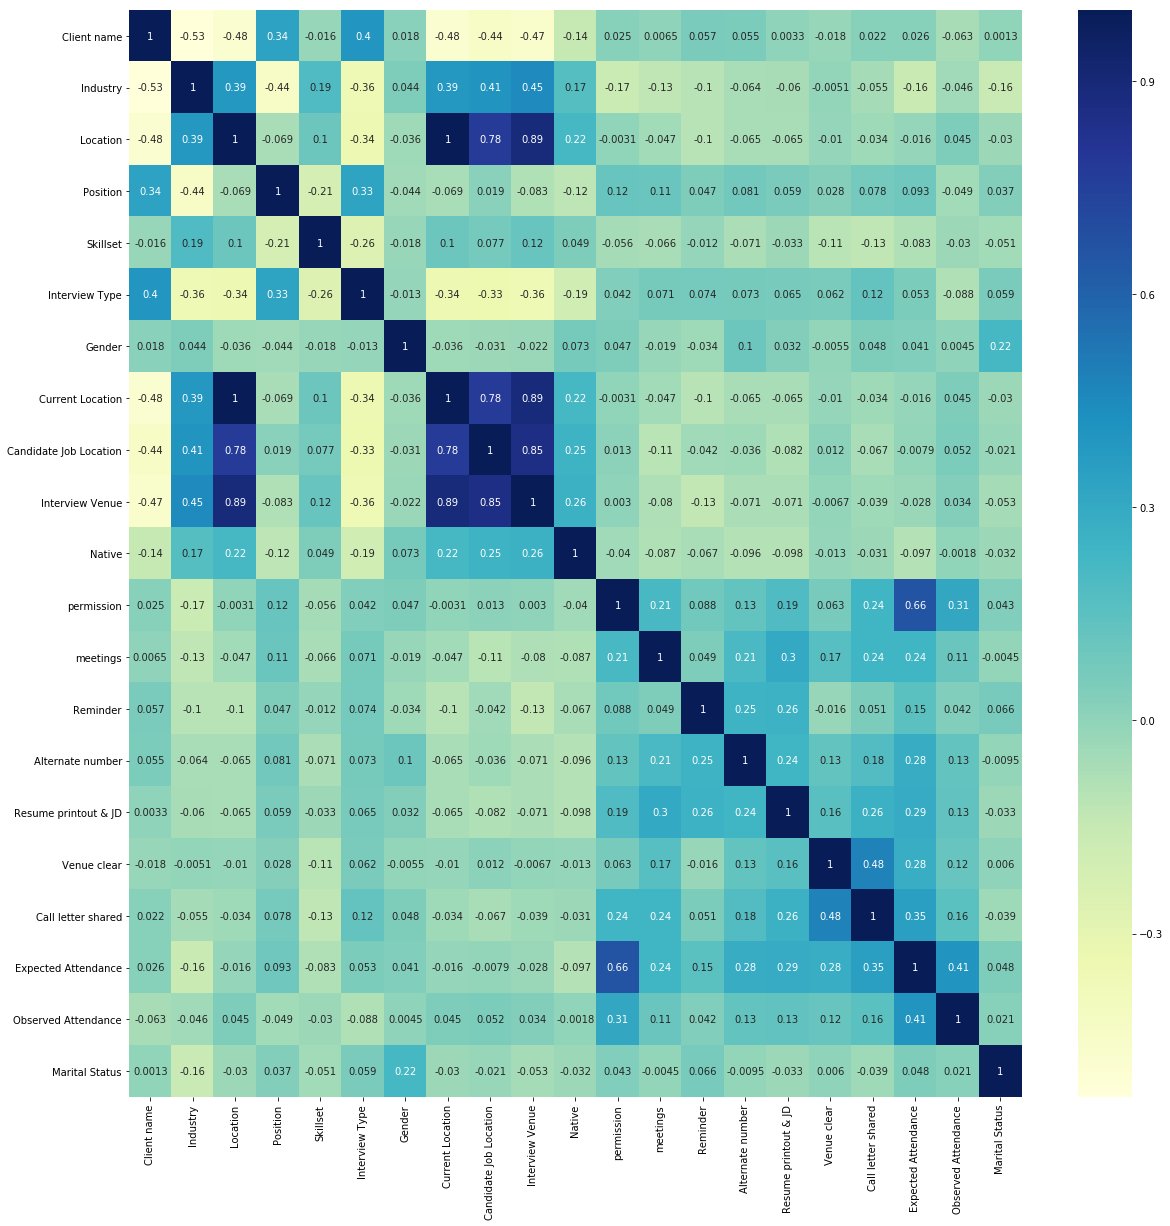

In [70]:
plt.figure(figsize=(20,20))
sns.heatmap(data1_corr,annot=True, cmap="YlGnBu")

In [71]:
# custom designed function
def extract_x_columns(df_y):
    X = df_y[df_y.between(0.1,0.8)].index        
    X = X.append(df_y[df_y.between(-0.8,-0.1)].index)    
    return X

In [72]:
# x_columns = extract_x_columns(data1_corr['Observed Attendance_Yes'])
# x_columns
# Y = data1['Observed Attendance_Yes']
# X = data1[x_columns]

In [73]:
Y = data1['Observed Attendance']
X = data1.drop(['Observed Attendance'], axis=True)

### Question: Perform classification using Naive Bayes algorithm and explain the performance

In [74]:
# Train and test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=62)
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(862, 20)

(370, 20)

(862,)

(370,)

In [75]:
from sklearn import naive_bayes
nb = naive_bayes.MultinomialNB()

In [76]:
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [77]:
pred_y = nb.predict(x_test)

In [78]:
# comparing the metrics of predicted lebel and real label of test data
print("Test Accuracy: ", metrics.accuracy_score(y_test, pred_y))

Test Accuracy:  0.6648648648648648
